In [1]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

import matplotlib.pyplot as plt #Data Visualization

import seaborn as sns #Data Visualization

import tensorflow as tf # a framework used for building and training deep learning models

import keras #Keras is an open-source high-level neural networks API 

from keras.preprocessing import image #used for loading, preprocessing, and augmenting images before feeding to neural network

from keras.models import Sequential

from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization

from tensorflow.keras.preprocessing.image import ImageDataGenerator #tool for real-time data augmentation and preprocessing of image data during model training.

import cv2

from keras import regularizers# Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function.

from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax #optimizers are algorithms or methods used to adjust the weights and biases of a neural network during training

2024-03-19 03:54:09.065830: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-19 03:54:09.065941: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-19 03:54:09.227435: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
img_size=224
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255, # Images are rescaled by a factor of 1./255.
                                         validation_split = 0.2
                                        )


In [3]:


train_generator = train_datagen.flow_from_directory(directory = '/kaggle/input/plantdisease/PlantVillage',
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "rgb", 
                                                    class_mode = "categorical", 
                                                    subset = "training" 
                                                   )
validation_generator = train_datagen.flow_from_directory( directory = '/kaggle/input/plantdisease/PlantVillage',
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "rgb",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


In [4]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential


model1 = Sequential()

# Layer 1: Convolutional Layer (C1)
model1.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(img_size, img_size, 3)))
# Layer 2: Map Pooling (S2)
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# Layer 3: Convolutional Layer (C3)
model1.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
# Layer 4: Max Pooling (S4)
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# Layer 5: Flatten
model1.add(Flatten())
# Layer 6: Fully Connected Layer (C5)
model1.add(Dense(units=120, activation='relu'))
# Layer 7: Fully Connected Layer (F6)
model1.add(Dense(units=84, activation='relu'))
# Output Layer
model1.add(Dense(units=15, activation='softmax')) 




/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [7]:
# Display model summary
model1.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 220, 220, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 106, 106, 16)   │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 44944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     5,393,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │         1,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,407,711 (20.63 MB)

 Trainable params: 5,407,711 (20.63 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the model, try for 65
history = model1.fit(train_generator, validation_data=validation_generator, epochs=60)



Epoch 1/60


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/259 ━━━━━━━━━━━━━━━━━━━━ 1:07:39 16s/step - accuracy: 0.1719 - loss: 2.6916

I0000 00:00:1710820584.862363     116 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1710820584.880113     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


258/259 ━━━━━━━━━━━━━━━━━━━━ 0s 869ms/step - accuracy: 0.3371 - loss: 2.1315

W0000 00:00:1710820810.556394     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


259/259 ━━━━━━━━━━━━━━━━━━━━ 297s 1s/step - accuracy: 0.3381 - loss: 2.1282 - val_accuracy: 0.6109 - val_loss: 1.1972
Epoch 2/60
259/259 ━━━━━━━━━━━━━━━━━━━━ 229s 866ms/step - accuracy: 0.6616 - loss: 1.0473 - val_accuracy: 0.7516 - val_loss: 0.7574
Epoch 3/60
259/259 ━━━━━━━━━━━━━━━━━━━━ 232s 876ms/step - accuracy: 0.7449 - loss: 0.7766 - val_accuracy: 0.7746 - val_loss: 0.6768
Epoch 4/60
259/259 ━━━━━━━━━━━━━━━━━━━━ 231s 872ms/step - accuracy: 0.7927 - loss: 0.6118 - val_accuracy: 0.8045 - val_loss: 0.5806
Epoch 5/60
259/259 ━━━━━━━━━━━━━━━━━━━━ 230s 868ms/step - accuracy: 0.8120 - loss: 0.5647 - val_accuracy: 0.8117 - val_loss: 0.5655
Epoch 6/60
259/259 ━━━━━━━━━━━━━━━━━━━━ 232s 878ms/step - accuracy: 0.8409 - loss: 0.4787 - val_accuracy: 0.8387 - val_loss: 0.4716
Epoch 7/60
259/259 ━━━━━━━━━━━━━━━━━━━━ 232s 879ms/step - accuracy: 0.8445 - loss: 0.4466 - val_accuracy: 0.8564 - val_loss: 0.4121
Epoch 8/60
259/259 ━━━━━━━━━━━━━━━━━━━━ 234s 886ms/step - accuracy: 0.8550 - loss: 0.4297 

In [9]:
# Save the model
model1.save("model1_lenet5.h5")

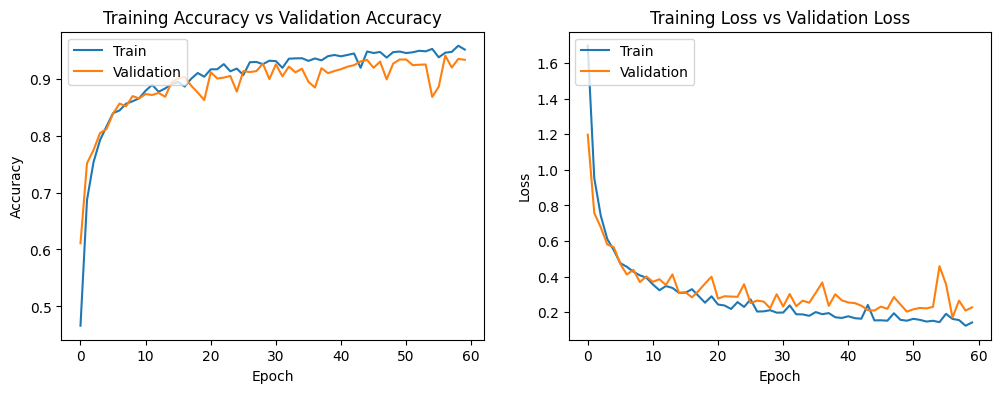

In [10]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [11]:
# Extract accuracy values
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Get the final accuracy after the last epoch
final_train_accuracy = train_accuracy[-1]
final_val_accuracy = val_accuracy[-1]

print("Final training accuracy:", final_train_accuracy)
print("Final validation accuracy:", final_val_accuracy)


Final training accuracy: 0.9511383175849915
Final validation accuracy: 0.9332848191261292
